# Problem 1: Extending the Lady Tasting Tea #

Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A participant claims they can tell which was poured first.

Simulate this experiment using `numpy` by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.

In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design.

## Import Packages ##

Begin by importing the packages required to perform the simulation of this experiment.

In [ ]:
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html
import random

# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

## Theoretical Probability ##

Set variables for total cups of tea and the number of cups with tea or milk first.

In [4]:
# Total number of cups of tea.
no_cups = 12

# Number of cups with tea first.
no_cups_tea_first = 8

# Number of cupts with milk first.
no_cups_milk_first = 4

Calculate the number of ways (combinations) to choose **k** elements from a set of **n** elements where the order of the chosen elements (permutations) does not matter and no element is selected more than once.   
We can compute the number of combinations using:

$\binom{n}{k} = \frac{n!}{k! \, (n-k)!}$

Where:  
**n** = Number of cups of tea in total.  
**k** = Number of cups of tea with milk in first.  

In [5]:
# Number of ways of selecting four cups from twelve.
ways = math.comb(no_cups, no_cups_milk_first)

# Show
ways

495

There are 495 ways of selecting 4 cups out of 12 cups in total, when ordering does not matter and no element is selected more than once.   
Only one of these combinations of 4 cups will contain all the '*no_cup_milk_first*' cups of tea.  
Mathematically, there is a 1/495 chance (~.2%) of correctly selecting the 4 cups with milk first out of the total pf 12 cups.

In [6]:
# Probability of randomly selecting the 4 cups with milk first:
1/ways

0.00202020202020202

The probability of randomly selecting the 4 cups with milk first is the same as the probability of randomly selecting the 8 cups with tea first because:

$\binom{12}{4} = \binom{12}{8} = 495$

If the 4 cups made with milk first are selected, then the remaining 8 made with tea first are also identified and all 12 cups have been distinguised.  

In [7]:
# Number of ways of selecting eight cups from twelve.
alt_ways = math.comb(no_cups, no_cups_tea_first)

#Show
print(alt_ways)

# Probability of randomly selecting the 8 cups with tea first:
1/alt_ways

495


0.00202020202020202

We expect the results of our simulation to yield a similar probability.

## Experiment Simulation ##

Label the cups from 0 to 11 and randomly assign 4 cups of tea that are made with milk first.

In [8]:
# Label the cups as a list.
labels = list(range(no_cups))

# Take a random sample of 4 as milk-first cups. 
# https://docs.python.org/3/library/random.html#random.sample
labels_milk_first = random.sample(labels, 4)
labels_milk_first.sort()

# The remainder are the 8 cups made tea-first.
labels_tea_first = list(set(labels) - set(labels_milk_first))

print(f"The 12 labelled cups are {labels}")
print(f"The milk-first cups are {labels_milk_first}")
print(f"The tea-first cups are {labels_tea_first}")

The 12 labelled cups are [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
The milk-first cups are [4, 7, 8, 9]
The tea-first cups are [0, 1, 2, 3, 5, 6, 10, 11]


Shuffle the cups once using numpy. The first k cups represents the participant's selection. Compare this with the pre-assigned milk-first cups.

In [9]:
print(f"The milk-first cups are {labels_milk_first}")

# Create a random number generator
rng = np.random.default_rng(seed=None)  

# Shuffle the cups using rng.permutation function
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html
shuffled = rng.permutation(labels)

# Simulate participant's guess: first k cups
k = len(labels_milk_first)
guess_milk = shuffled[:k]

# Sort for comparison purposes
guess_milk.sort()

print(f"The participant's selection is {list(guess_milk)}")

if set(guess_milk) == set(labels_milk_first):
    print(f"The participant has correctly selected all {k} milk-first cups")
else:
    print(f"The participant has not correctly selected all {k} milk-first cups")

The milk-first cups are [4, 7, 8, 9]
The participant's selection is [1, 6, 7, 10]
The participant has not correctly selected all 4 milk-first cups


Extend to randomly shuffle the cups many times and calculate the simulated probability of the participant correctly identifying all cups by chance.

In [10]:
def simulate_probability(labels, labels_milk_first, no_sims=1_000_000, seed=None):

    """
    Estimate the probability of correctly identifying all milk-first cups by random guessing.

    Parameters:
    labels: Labels of all cups
    labels_milk_first: Labels of cups made with milk first
    no_sims: Number of simulations (default 1,000,000)
    seed: Random seed for reproducibility (default None)

    Returns proportion of simulations where all milk-first cups are correctly identified.
    """

    # Shuffle the cups using rng.permutation function
    # https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html
    rng = np.random.default_rng(seed)
    perm = rng.permutation
    
    # Turn labels into a numpy array for shuffling all cups of tea.
    labels = np.array(labels)
    # Turn labels_milk_first into a set for order independent comparison
    milk_set = set(labels_milk_first)
    # number of milk first cups
    k = len(labels_milk_first) 
    
    # start success counter
    success = 0 

    # Loop through simulations.
    for _ in range(no_sims):
        # shuffle all cups
        shuffled = perm(labels)
        # take first k as participant's simulated guess for milk first cups of tea
        guess_milk = set(shuffled[:k])  
        
        # compare guessed cups with milk-first-labelled cups and increase counter if they match (correct guess)
        if guess_milk == milk_set:
            success += 1

    return success / no_sims

In [11]:
# Use p_sim, to call the function and return the estimated probability based on the simulation.
p_sim = simulate_probability(labels, labels_milk_first)
p_sim

0.001977

The simulated probability (p_sim) closely matches the theoretical probability previously computed as 1/495 = ~0.2%, validating the correctness of our simulation approach.

## Comparison with Original (8-cup) Experiment. ##

Increasing the total number of cups while keeping the number of milk-first cups fixed **substantially increases the number of possible combinations** (from 70 to 495). This sharply **reduces the probability of a correct guess by chance**. In the original 8-cup experiment, the probability of correctly identifying all milk-first cups by chance is approximately 0.014, compared to approximately .002 in the extended 12-cup experiment. In other words, in the **extended experiment** the participant is **~7 times less likely** to perfectly distinguish the cups of tea by chance. 

Due to this reduced probability, a successful guess in the extended experiment provides substantially **stronger evidence** that the participant can genuinely discriminate whether the milk or the tea infusion was first added to the cup.

**Table 1. Comparison of key metrics for the original experiment versus the extended experiment:**

| Feature | Original Experiment | Extended Experiment |
|--------|---------------------|---------------------|
| Total number of cups | 8 | 12 |
| Tea-first cups | 4 | 8 |
| Milk-first cups | 4 | 4 |
| Cups to identify correctly | 4 | 4 |
| Number of possible selections | 70 | 495 |
| $(p)$-value | 0.0143 | 0.0020 |
| Reject $H_0$ at $\alpha = 0.05$ | Yes | Yes |
| Reject $H_0$ at $\alpha = 0.01$ | No | Yes |

*Note: $(p)$-value represent the probability, under random guessing, of correctly identifying all 4 milk-first cups*

In the [original experiment](https://en.wikipedia.org/wiki/Lady_tasting_tea), Fisher was willing to reject the null hypothesis only if the lady could correctly categorize all cups of tea, implicitly acknowledging the lady's ability at a 1.4% significance level. Fisher could not lower the significance level (e.g. to 1%), because the null hypothesis would not be rejected even if the lady correctly categorized all 8 cups of tea. By design, controlling false positives (Type I errors) was prioritized over maximizing sensitivity (Type II errors).

In the extended experiment, using the same decision rule (reject the null hypothesis only if the participant can correctly categorize all cups of tea), the implied significance level tightens to ~0.2%. With this stricter threshold, there is less chance for [Type I errors](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors#Type_I_error) (false positives) and there is very strong evidence against guessing. Relaxing the threshold (e.g. "at least 3 correct") would undermine the evidential strength of the extension. Although this stricter criterion increases the risk of [Type II error](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors#Type_II_error) for marginal ability, it aligns with the original purpose of the experiment: providing strong evidence against random guessing rather than maximizing sensitivity. 

# Problem 2: Normal Distribution #

Generate 100,000 samples of size 10 from the standard normal distribution. For each sample, compute the standard deviation with `ddof=1` (sample SD) and with `ddof=0` (population SD). Plot histograms of both sets of values on the same axes with transparency. Describe the differences you see. Explain how you expect these differences to change if the sample size is increased.

## Setup: Import Packages & Data Generation ##

Import the packages required to perform analysis on the standard deviations of standard normal distribution samples.

The packages required are `numpy` for random number generation and `matplotlib` for plotting.

In [ ]:
# Numpy already imported.

# Plotting.
import matplotlib.pyplot as plt

Generate 100,000 samples of size 10 from the [standard normal distribution](https://en.wikipedia.org/wiki/Normal_distribution#Standard_normal_distribution), i.e. mean ($\mu$) = 0 and standard deviation ($\sigma$ = 1).  

We can generate data from the standard normal distribution using `numpy's` [random.normal function](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html), passing in a `tuple` (100_000, 10) with immutable values.

In [ ]:
# Generate 100,000 samples of size 10 from the standard normal distribution.
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
data = np.random.normal(size=(100_000, 10))

#Show top 10 rows.
data[:10]

array([[-3.0585754 ,  1.00785468,  0.40867413,  0.94166749,  0.9614392 ,
         0.20421526,  1.40407532,  0.4174614 ,  1.87984918,  0.18030413],
       [ 0.38106089,  0.28066559, -1.24881023, -0.08464727, -0.50683761,
         1.18296235, -2.16989976,  0.07882719, -1.30512758,  2.26926583],
       [ 0.10050311, -2.67629683,  0.67898116, -1.30995994, -1.37527165,
        -1.56151672, -0.74582766, -0.01605694, -0.1719631 ,  1.46208329],
       [ 0.06467476, -1.02259874, -0.62172741, -0.1267283 , -0.70766303,
        -0.87517232, -0.3065354 , -0.92192876,  1.05272236, -0.2790124 ],
       [ 0.05771166,  0.9137803 , -0.83212287,  1.21624062, -1.10524778,
         0.45317903, -1.18187402, -2.78979721,  0.01146548,  1.0452993 ],
       [ 0.22494407,  0.74193308,  0.94341994,  1.60452301, -1.24355903,
        -1.25566197, -1.05800945, -0.86935256,  0.18314477,  0.42593277],
       [-0.13289745,  0.12657034,  0.1947721 ,  0.35115341,  0.56700183,
        -0.07060393,  0.64204587,  1.31555868

This has generated 100,000 samples of size 10, represented as a 2 dimensional array with 100,000 rows and 10 columns.

## Standard Deviations & Bassel's Correction ##

To calculate standard deviations, we can use `numpy's` [std function](https://numpy.org/doc/stable/reference/generated/numpy.std.html)

`Numpy's` default standard deviation calculation with this function uses `ddof=0` and corresponds with the expression: $\sqrt{\frac{1}{N}\sum_{i} | \alpha_i - \bar{\alpha} |^2}$

This is sometimes referred to as the "population standard deviation" because it applies the definition of standard deviation to the sample data as if it were a complete population of possible observations. This calculation introduces bias toward lower values because a sample mean is used in place of the true mean of the population.

[Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction) is the use of $n-1$ instead of $n$ in the denominator of the formula for the standard deviation: $\sqrt{\frac{1}{N-1}\sum_{i} | \alpha_i - \bar{\alpha} |^2}$

This is sometimes referred to as the "sample standard deviation". The resulting estimate of the standard deviation is still biased, but less than it would have been without the correction. To implement Bassel's correction, we can use the same `numpy.std` function with a `ddof=1`.

In [ ]:
# Calculate sample satandard deviation (Bessel's correction, degrees of freedom = 1) and the population standard deviation (degrees of freedom = 0)
# https://numpy.org/doc/stable/reference/generated/numpy.std.html
sample_sd = np.std(data, axis=1, ddof = 1)
pop_sd = np.std(data, axis=1) #ddof defaults to 0

# Show
print(f"Top 10 sample standard deviations: \n {sample_sd[:10]} \n")
print(f"Top 10 population standard deviations: \n {pop_sd[:10]}")

Top 10 sample standard deviations: 
 [1.34217523 1.28618952 1.2133503  0.61891194 1.25700268 1.01487178
 0.42637621 1.09615548 1.4507639  1.10961749] 

Top 10 population standard deviations: 
 [1.27329922 1.22018652 1.15108516 0.58715142 1.19249745 0.96279191
 0.40449598 1.0399044  1.37631549 1.05267558]


## Histogram Plots ##

To display the effect of Besell's correction, we can plot histograms of both sets of values on the same axes.  
We expect both standard deviations to exhibit bias towards values less than the true normal standard deviation of 1.  
Bessel's correction should result in the 'sample standard deviation with `ddof=1`' being less biased than the 'population standard deviation' with `ddof=0`

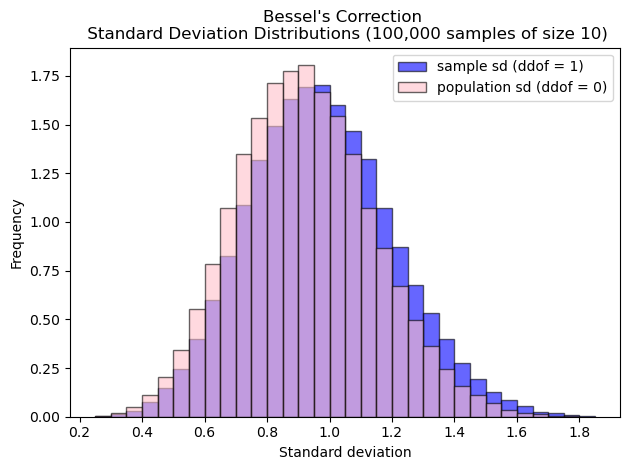

In [85]:
# Create a blank plot.
fig, ax = plt.subplots()
# Set no. of bins and spacing
bins = np.linspace(0.25, 1.85, 33)

# Create a histogram for sample standard deviations.
ax.hist(sample_sd, color='blue', edgecolor='black', density=True, bins=bins, alpha = 0.6, label = 'sample sd (ddof = 1)');
ax.hist(pop_sd, color='pink', edgecolor='black', density=True, bins=bins, alpha = 0.6, label = 'population sd (ddof = 0)');

# Labels
plt.xlabel("Standard deviation")
plt.ylabel("Frequency")
plt.title("Bessel's Correction \n Standard Deviation Distributions (100,000 samples of size 10)")
plt.legend()
plt.tight_layout()
plt.show()

## Comparison of sample and population standard deviations ##

Key observtions from the above histogram are:
1. Both histograms have a substantial overlap and have similar bell shapes.
2. Both distributions are biased with mean standard deviations less than the true standard deviation for a standard normal distribution of 1.
3. The sample standard deviation (`ddof=1`) distribution (Bessel's correction) is less biased (i.e. further to the right). Its center (mean) is closer to 1.
4. The population standard deviation (`ddof=0`) distribution is further to the left. It is more biased and systematically underestimates the true standard deviation of 1.

One of the [caveats of Bessel's Correction](https://en.wikipedia.org/wiki/Bessel%27s_correction#Caveats) is that it often has a higher mean squared error (MSE).   
We cannot readily observe the difference in mean squared errors in the above histogram. We can calculate below, along with the means for illustration.

In [90]:
# Compare means and mean squared error MSE

# Print means and difference:
print("Means:")
print(f"Mean sample SD (ddof=1): {sample_sd.mean()}")
print(f"Mean population SD (ddof=0): {pop_sd.mean()}")
print(f"Difference between the sample SD and population SD: {sample_sd.mean()-pop_sd.mean()}\n")

# MSE
# True standard deviation
true_sd = 1.0

# Calculate MSE for both sample and population standard deviations
mse_sample = ((sample_sd - true_sd) ** 2).mean()
mse_pop = ((pop_sd - true_sd) ** 2).mean()

#Print MSEs and difference
print("Mean Squared Error (MSE):")
print(f"MSE of sample SD (ddof=1): {mse_sample}")
print(f"MSE of population SD (ddof=0): {mse_pop}")
print(f"Difference between the MSE of sample SD and MSE of population SD: {mse_sample-mse_pop}")

Means:
Mean sample SD (ddof=1): 0.972663210068725
Mean population SD (ddof=0): 0.9227493420203979
Difference between the sample SD and population SD: 0.04991386804832709

Mean Squared Error (MSE):
MSE of sample SD (ddof=1): 0.05480273100218811
MSE of population SD (ddof=0): 0.05461755198487878
Difference between the MSE of sample SD and MSE of population SD: 0.00018517901730932818


## Increasing the Sample Size ##

If the sample size is increased, we would expect both distributions with `ddof=0` and `ddof=1` to:

1. Move towards the true standard deviation of 1, as bias is decreased. 
2. Tighten, as outliers have less significance with larger samples sizes.
3. Have lower mean squared errors, as the standard deviations become more accurate and more stable.

Let's test these assumptions:

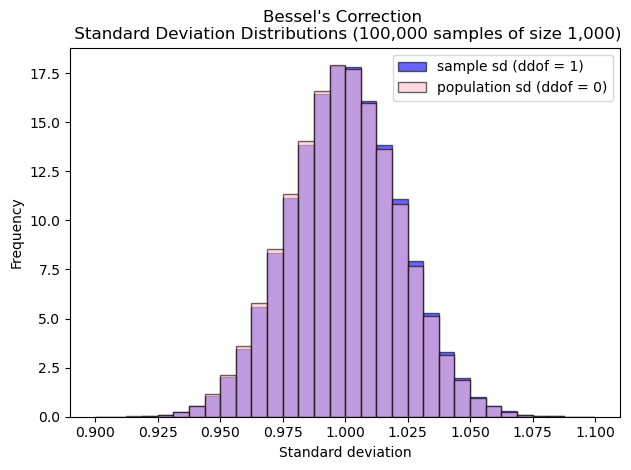

In [92]:
bigger_samples = np.random.normal(size=(100_000, 1_000))

bs_sample_sd = np.std(bigger_samples, axis=1, ddof = 1)
bs_pop_sd = np.std(bigger_samples, axis=1) #ddof defaults to 0

# Create a blank plot.
fig, ax = plt.subplots()
# Set no. of bins and spacing
bins = np.linspace(0.9, 1.1, 33)

# Create a histogram for sample standard deviations.
ax.hist(bs_sample_sd, color='blue', edgecolor='black', density=True, bins=bins, alpha = 0.6, label = 'sample sd (ddof = 1)');
ax.hist(bs_pop_sd, color='pink', edgecolor='black', density=True, bins=bins, alpha = 0.6, label = 'population sd (ddof = 0)');

# Labels
plt.xlabel("Standard deviation")
plt.ylabel("Frequency")
plt.title("Bessel's Correction \n Standard Deviation Distributions (100,000 samples of size 1,000)")
plt.legend()
plt.tight_layout()
plt.show()

In [93]:
# Compare means and mean squared error MSE

# Print means and difference:
print("Means:")
print(f"Mean sample SD (ddof=1): {bs_sample_sd.mean()}")
print(f"Mean population SD (ddof=0): {bs_pop_sd.mean()}")
print(f"Difference between the sample SD and population SD: {bs_sample_sd.mean()-bs_pop_sd.mean()}\n")

# MSE
# True standard deviation
true_sd = 1.0

# Calculate MSE for both sample and population standard deviations
bs_mse_sample = ((bs_sample_sd - true_sd) ** 2).mean()
bs_mse_pop = ((bs_pop_sd - true_sd) ** 2).mean()

#Print MSEs and difference
print("Mean Squared Error (MSE):")
print(f"MSE of sample SD (ddof=1): {bs_mse_sample}")
print(f"MSE of population SD (ddof=0): {bs_mse_pop}")
print(f"Difference between the MSE of sample SD and MSE of population SD: {bs_mse_sample-bs_mse_pop}")

Means:
Mean sample SD (ddof=1): 0.9998015671073164
Mean population SD (ddof=0): 0.9993015412860403
Difference between the sample SD and population SD: 0.0005000258212760622

Mean Squared Error (MSE):
MSE of sample SD (ddof=1): 0.0004989603283600855
MSE of population SD (ddof=0): 0.000498909876369546
Difference between the MSE of sample SD and MSE of population SD: 5.0451990539534045e-08


In summary, Bessel's correction `ddof=1` gives a more accurate standard deviation, and is particularly significant for smaller samples sizes.  
Although it reduces bias, it is still biased towards values less than the true standard deviation for a standard normal distribution of 1.  
It can also exhibit a higher mean squared error than the equivalent standard deviation with `ddof`=0.

As sample sizes increase, the improved accuracy from Bessel's correction becomes less signficant. 

# Problem 3: t-Tests #

A type II error occurs when a test fails to reject the null hypothesis even though it is false. For each mean difference 
d=0, 0.1, 0.2, … , 1.0, repeat the following simulation 1,000 times:

1. Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean d and standard deviation 1.
2. Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.
3. Record the proportion of times the null hypothesis is not rejected.

Plot this proportion against d, and explain how the type II error rate changes as the difference in means increases.

## Setup: Import Packages and Set Variables ##

We will use `numpy` to generate random samples, specifically the [arrange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) and [random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) functions.

We will use the `scipy.stats` [ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) function to calculate the T-test for the means of two independent samples of scores. This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. Because both our samples have a standard deviation = 1, our setup is in keeping with the test assumption that the populations have identical variances by default.

In [191]:
# numpy already imported

# Statistical functions.
import scipy.stats as stats

Create the variables we need to repeat the following simulation 1,000 times:

1. For each mean difference d=0, 0.1, 0.2, … , 1.0, 
2. Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean d and standard deviation 1.
3. Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than $\alpha = 0.05$.
4. Record the proportion of times the null hypothesis is not rejected.

In [138]:
# Generate d values using np.arrange function: https://numpy.org/doc/stable/reference/generated/numpy.arange.html
# Note: Values are generated within the half-open interval [0, stop) (in other words, the interval including start but excluding stop).
ds = np.arange(0, 1.01, 0.1)

# sample size for both samples
n = 100

# level of significance
alpha = 0.05

# number of simulations per d
no_sims = 1_000

## Null Hypothesis and Type II Error ##

The null hypothesis for this t-test is that the 2 independent samples have identical average (expected) values.

By design, the independent samples only have identical means when d = 0.

$H_0: \mu_1 = \mu_2, \text{when d = 0} \quad \quad \quad H_1: \mu_1 \neq \mu_2, \text{when d > 0}$


A correct decision with probability ($1 - \alpha$) to not reject $H_0$ occurs when d = 0. 

A type II error occurs when the t-test fails to reject $H_0$ even though $H_0$ is false, i.e. when d > 0.

The probability of a type II error is $\beta = P(\text{fail to reject } H_0 \mid H_0 \text{ is false})$ which we estimate by simulation.

Confusion Matrix:
| Reality ↓ / Decision → | Reject H₀ | Fail to Reject H₀ |
|-----------------------|-----------|------------------|
| **H₀ true (d = 0)**   | Type I error (α) | Correct decision (1 − α) |
| **H₀ false (d > 0)**  | Correct decision / Power (1 − β) | Type II error (β) |

## Simulation ##

In order to simulate the test 1,000 times, loop through the different d values for the normal distribution (outer loop), and run the t-test for each simulation (inner loop). Track the number of times the null hypothesis is not rejected, and calculate this as a proportion of the total number of simulations ('out of 1,000').

In [ ]:
# Store the proportion of simulations where the null is not rejected for each d
null_no_reject_rate = []

# Outer loop to iterate through d values
for d in ds:
    # Start counter for numbers of times null hypothesis is not rejected
    null_no_reject = 0

    # Inner loop to simulate the t-test 1,000 times
    for _ in range(no_sims):
        sample_normal = np.random.normal(d, 1, n)
        sample_stand = np.random.normal(0, 1, n)
    
        # Perform an independent t-test
        result=stats.ttest_ind(sample_normal, sample_stand)

        # Extract p value from result output (we don't need t stat or ddof values)
        # t_stat=result.statistic
        p_val=result.pvalue
        # ddof=result.df

        # Count all cases where H_0 is not rejected
        # When d = 0, H_0 is true and correctly not rejected (1 - α)
        # When d > 0, H_0 is false and incorrectly not rejected (β)
        if p_val >= alpha:
            null_no_reject += 1
    
    # Append counter and recalc proprotion of no rejections
    null_no_reject_rate.append(null_no_reject / no_sims)

## Plotting ##

Plot the proportion of simulations where the null hypothesis is not rejected against the mean differences d, differentiating between:
1. Null $H_0$ is true at d = 0 and is correctly not rejected.
2. Null $H_0$ is false at d > 0 and is incorrectly not rejected. 

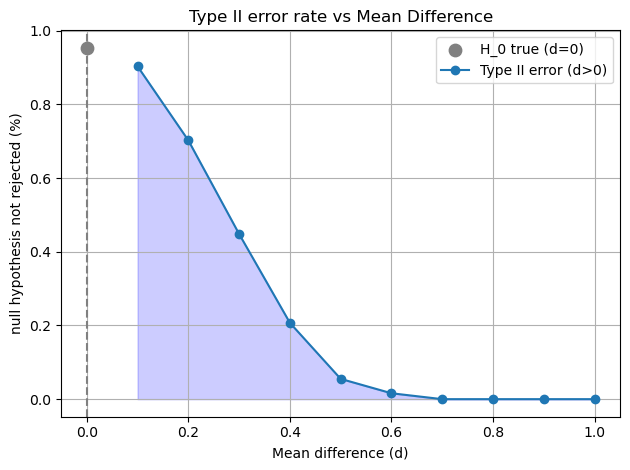

In [ ]:
# First plot a horizontal line at d=0
# Here, the null H_0 is true and we correctly fail to reject it.
plt.axvline(0, color='gray', linestyle='--')

# Add a point for the no_reject rate at d = 0
plt.scatter(0, null_no_reject_rate[0], color='gray', s=80, zorder=5, label="H_0 true (d=0)")

# Exclude d = 0 for type II error
type_ii_ds = ds[1:] # d > 0
type_ii_rate = null_no_reject_rate[1:] # β(d)

# Plot the proportion of type II errors for each mean difference d.
plt.plot(type_ii_ds, type_ii_rate, marker="o", label="Type II error (d>0)")

# Shade the area under the Type II error curve
plt.fill_between(type_ii_ds, type_ii_rate, color="blue", alpha=0.2)

# Add axes, title, grid & legend
plt.xlabel("Mean difference (d)")
plt.ylabel("Proportion of sims where H_0 not rejected")
plt.title("Type II error rate vs Mean Difference")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show
plt.show()

In [169]:
# Check select outputs
print(f"d values: {ds}")
print(f"proprotion of times the null hypothesis is not rejected: {null_no_reject_rate}")

d values: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
proprotion of times the null hypothesis is not rejected: [0.953, 0.903, 0.702, 0.448, 0.207, 0.055, 0.016, 0.0, 0.0, 0.0, 0.0]


## Summary ##
For small mean difference (d) values:
- The standard normal distribution ($\mu=0, \sigma=1$) and normal distribution ($\mu=d, \sigma=1$) have large overlap and the t-test has difficulty distinguishing between them.
- Type II error rate ($\beta$) is high => low power ($1-\beta$): Failing to reject the null $H_0$ when it is false (d > 0) is common.

As the mean difference (d) values increase:
- The difference between the sample means becomes larger and more easily distinguishable by the t-test.
- There is a steep drop off in the Type II error rate as it approaches zero. Statistical power ($1 - \beta$) is increased.

Larger differences in means are easier to detect, so the test is less likely to miss a real effect, and the type II error rate decreases.

# Problem 4: ANOVA #

Generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1.

1. Perform a one-way ANOVA to test whether all three means are equal.
2. Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3.
3. Compare the conclusions.

Write a short note on why ANOVA is preferred over running several t-tests.

## Setup: Import Packages and Data Generation ##

We will use `numpy` to generate three random (independent) samples from normal distributions, specifically via the [random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) function.

We will use the `scipy.stats` [ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) function to calculate three independent two-sample t-tests for the means of two independent samples: 1 vs 2, 1 vs 3 and 2 vs 3. 
This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. Because our three samples have standard deviations of 1, our setup is in keeping with the test assumption that the populations have identical variances by default.

We will also use the package to perform ANOVA testing: using the [f_oneway](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html) function to generate the test results and [tukey_hsd](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html#scipy.stats.tukey_hsd) to help interpret them.

We will import `pandas` in order to store the generated samples as data frames in order to quickly generate descriptive stats.

In [181]:
# numpy already imported

# scipy.stats already imported

# Pandas data frames
import pandas as pd

Generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1.

In [221]:

# Set random seed for repeatability.
np.random.seed(42)

# First sample.
sample_a = np.random.normal(loc=0.0, scale=1.0, size=30)

# Second sample.
sample_b = np.random.normal(loc=0.5, scale=1.0, size=30)

# Third sample.
sample_c = np.random.normal(loc=1.0, scale=1.0, size=30)

# Show
sample_a[:10], sample_b[:10], sample_c[:10]

(array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
        -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004]),
 array([-0.10170661,  2.35227818,  0.48650278, -0.55771093,  1.32254491,
        -0.72084365,  0.7088636 , -1.45967012, -0.82818605,  0.69686124]),
 array([ 0.52082576,  0.81434102, -0.10633497, -0.19620662,  1.81252582,
         2.35624003,  0.92798988,  2.0035329 ,  1.36163603,  0.35488025]))

Plot the three samples on histograms. (Doesn't show us much - may **DELETE** this section)

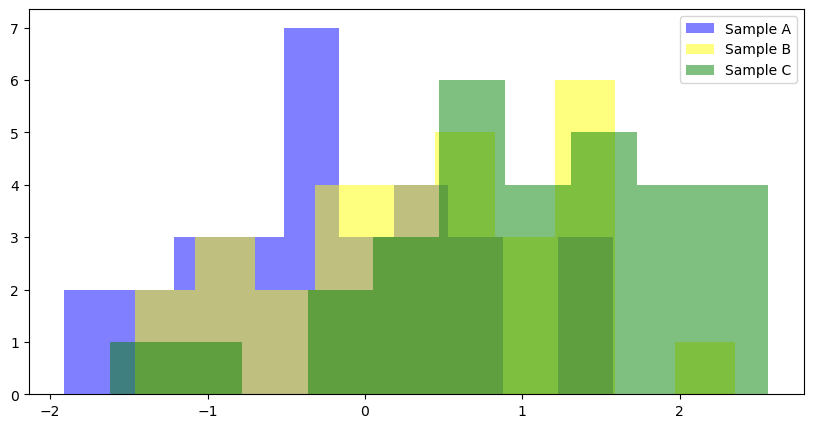

In [222]:
# Create histograms.
fig, ax = plt.subplots(figsize=(10, 5))

# Histogram of the first sample.
ax.hist(sample_a, color='blue', bins=10, alpha=0.5, label='Sample A')

# Histogram of the second sample.
ax.hist(sample_b, color='yellow', bins=10, alpha=0.5, label='Sample B')

# Histogram of the third sample.
ax.hist(sample_c, color='green',bins=10, alpha=0.5, label='Sample C')

# Add a legend.
ax.legend();

Create a pandas data frame

In [223]:
# Create data frame
df = pd.DataFrame({'Sample A': sample_a, 'Sample B': sample_b, 'Sample C': sample_c})

# Show top 10
df[:10]

,Sample A,Sample B,Sample C
0,0.496714,-0.101707,0.520826
1,-0.138264,2.352278,0.814341
2,0.647689,0.486503,-0.106335
3,1.523030,-0.557711,-0.196207
4,-0.234153,1.322545,1.812526
5,-0.234137,-0.720844,2.356240
6,1.579213,0.708864,0.927990
7,0.767435,-1.459670,2.003533
8,-0.469474,-0.828186,1.361636
9,0.542560,0.696861,0.354880


Describe the data frame.

In [224]:
# Describe
df.describe()

,Sample A,Sample B,Sample C
count,30.000000,30.000000,30.000000
mean,-0.188147,0.378838,1.012885
std,0.900006,0.931102,0.991983
min,-1.913280,-1.459670,-1.619745
25%,-0.591051,-0.209114,0.485858
50%,-0.234145,0.435427,1.025611
75%,0.360335,1.044662,1.737711
max,1.579213,2.352278,2.564644


## ANOVA and Tukey's HSD ##

Perform a one-way ANOVA to test whether all three means are equal. The ANOVA null hypothesis is that there is no difference across the three groups. By design, our samples have been generated with different means (0, 0.5 and 1) so we expect this null hypothesis to be rejected.

In [225]:
# Perform ANOVA
stats.f_oneway(df['Sample A'], df['Sample B'], df['Sample C'])

F_onewayResult(statistic=12.209525517972807, pvalue=2.120074814050707e-05)

The P-value associated with f-statistic suggests we should reject the null hypothesis because it is less than 0.05. 
This ANOVA test does not provide details of which samples differ from one another.
To establish this, use the `tukey_hsd` function.

In [226]:
# Tukey's HSD
res = stats.tukey_hsd(df['Sample A'], df['Sample B'], df['Sample C'])

# Show
print(res)

Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.567     0.057    -1.147     0.013
 (0 - 2)     -1.201     0.000    -1.781    -0.621
 (1 - 0)      0.567     0.057    -0.013     1.147
 (1 - 2)     -0.634     0.029    -1.214    -0.054
 (2 - 0)      1.201     0.000     0.621     1.781
 (2 - 1)      0.634     0.029     0.054     1.214



Based on the p-values above: 
1. The 0 - 1 p-value is marginally inside the .05 cut off. There is no evidence to suggest we should reject the null that Groups 0 – 1 are different.
2. There is evidence to suggest we should reject the null hypothesis that Groups 0 – 2 are the same. 
3. There is evidence to suggest we should reject null hypothesis that Groups 1 – 2 are the same. 

## Independent Two-Sample T-tests ##

Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3.

## END ##